In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df=pd.read_csv('data.csv',encoding='unicode_escape')
# Reading the dataset

## Data Understanding

In [3]:
df.head() 
# Loading the dataset

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,95.0,01-02-2004,Andhra Pradesh,Hyderabad,Andhra Pradesh State Pollution Control Board,Industrial Area,12.9,55.8,143.7,370.7,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",NaN,01-02-2004
1,95.0,01-05-2004,Andhra Pradesh,Hyderabad,Andhra Pradesh State Pollution Control Board,Industrial Area,10.4,48.9,124.7,285.7,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",NaN,01-05-2004
2,95.0,01-09-2004,Andhra Pradesh,Hyderabad,Andhra Pradesh State Pollution Control Board,Industrial Area,7.6,50.1,88.0,221.3,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",NaN,01-09-2004
3,95.0,01-12-2004,Andhra Pradesh,Hyderabad,Andhra Pradesh State Pollution Control Board,Industrial Area,7.3,48.5,82.7,186.7,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",NaN,01-12-2004
4,95.0,16-01-2004,Andhra Pradesh,Hyderabad,Andhra Pradesh State Pollution Control Board,Industrial Area,6.8,110.3,122.3,270.7,"C.I.T.D., Balanagar, Plot no. A1 to A8, IDA, H...",NaN,16-01-2004


In [4]:
df.shape
# As we can see that there are 4,35,742 rows and 13 columns in the dataset

(166468, 13)

In [5]:
df.info()
# Checking the over all information on the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166468 entries, 0 to 166467
Data columns (total 13 columns):
stn_code                       41297 non-null float64
sampling_date                  166468 non-null object
state                          166468 non-null object
location                       166468 non-null object
agency                         41297 non-null object
type                           166267 non-null object
so2                            143456 non-null float64
no2                            158953 non-null float64
rspm                           166468 non-null float64
spm                            166468 non-null float64
location_monitoring_station    165173 non-null object
pm2_5                          0 non-null float64
date                           166468 non-null object
dtypes: float64(6), object(7)
memory usage: 16.5+ MB


In [6]:
df.isnull().sum()
# There are a lot of missing values present in the dataset

stn_code                       125171
sampling_date                       0
state                               0
location                            0
agency                         125171
type                              201
so2                             23012
no2                              7515
rspm                                0
spm                                 0
location_monitoring_station      1295
pm2_5                          166468
date                                0
dtype: int64

In [7]:
df.describe()
# Checking the descriptive stats of the numeric values present in the data like mean, standard deviation, min values and max value present in the data

,stn_code,so2,no2,rspm,spm,pm2_5
count,41297.000000,143456.000000,158953.000000,166468.000000,166468.000000,0.0
mean,323.950117,11.195698,27.253248,105.874568,218.226735,NaN
std,190.209322,9.104469,18.241758,74.679164,148.871860,NaN
min,6.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,161.000000,5.300000,15.000000,55.000000,110.000000,NaN
50%,322.000000,8.500000,23.000000,88.000000,184.000000,NaN
75%,452.000000,14.200000,34.000000,136.000000,292.000000,NaN
max,780.000000,273.300000,334.900000,6307.033333,2610.000000,NaN


In [8]:
df.state.unique()
df.state.count()

166468

In [9]:
df.nunique()
# These are all the unique values present in the dataframe

stn_code                        329
sampling_date                  3511
state                            32
location                        177
agency                           36
type                              6
so2                            3150
no2                            5567
rspm                           4230
spm                            6591
location_monitoring_station     673
pm2_5                             0
date                           3511
dtype: int64

### Checking all null values and treating those null values.

In [10]:
df.isnull().sum()

stn_code                       125171
sampling_date                       0
state                               0
location                            0
agency                         125171
type                              201
so2                             23012
no2                              7515
rspm                                0
spm                                 0
location_monitoring_station      1295
pm2_5                          166468
date                                0
dtype: int64

In [11]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
# Checking all null values

In [12]:
nullvalues
# higher null values present in pm2_5 followed by spm

pm2_5                          166468
agency                         125171
stn_code                       125171
so2                             23012
no2                              7515
location_monitoring_station      1295
type                              201
date                                0
spm                                 0
rspm                                0
location                            0
state                               0
sampling_date                       0
dtype: int64

In [13]:
df.isnull().count()

stn_code                       166468
sampling_date                  166468
state                          166468
location                       166468
agency                         166468
type                           166468
so2                            166468
no2                            166468
rspm                           166468
spm                            166468
location_monitoring_station    166468
pm2_5                          166468
date                           166468
dtype: int64

In [14]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100)#.sort_values(ascending=False)
#count(returns Non-NAN value)
null_values_percentage

stn_code                        75.192229
sampling_date                    0.000000
state                            0.000000
location                         0.000000
agency                          75.192229
type                             0.120744
so2                             13.823678
no2                              4.514381
rspm                             0.000000
spm                              0.000000
location_monitoring_station      0.777927
pm2_5                          100.000000
date                             0.000000
dtype: float64

In [15]:
null_values_percentage.sort_values(ascending=False)

pm2_5                          100.000000
agency                          75.192229
stn_code                        75.192229
so2                             13.823678
no2                              4.514381
location_monitoring_station      0.777927
type                             0.120744
date                             0.000000
spm                              0.000000
rspm                             0.000000
location                         0.000000
state                            0.000000
sampling_date                    0.000000
dtype: float64

In [16]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])
# Concatenating total null values and their percentage of missing values for further imputation or column deletion

In [17]:
missing_data_with_percentage
# As you can see below these are the percentages of null values present in the dataset

,Total,Percent
agency,125171,75.192229
date,0,0.000000
location,0,0.000000
location_monitoring_station,1295,0.777927
no2,7515,4.514381
pm2_5,166468,100.000000
rspm,0,0.000000
sampling_date,0,0.000000
so2,23012,13.823678
spm,0,0.000000


In [18]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)
# Dropping unnecessary columns

In [19]:
df.isnull().sum()
# Now checking the null values

state            0
location         0
type           201
so2          23012
no2           7515
rspm             0
spm              0
pm2_5       166468
dtype: int64

In [20]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,Industrial Area,12.9,55.8,143.7,370.7,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,10.4,48.9,124.7,285.7,NaN
2,Andhra Pradesh,Hyderabad,Industrial Area,7.6,50.1,88.0,221.3,NaN
3,Andhra Pradesh,Hyderabad,Industrial Area,7.3,48.5,82.7,186.7,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,6.8,110.3,122.3,270.7,NaN
...,...,...,...,...,...,...,...,...
166463,West Bengal,Kolkata,Industrial Area,8.0,54.0,106.0,50.0,NaN
166464,West Bengal,Kolkata,Industrial Area,9.0,49.0,123.0,54.0,NaN
166465,West Bengal,Kolkata,Industrial Area,7.0,47.0,107.0,50.0,NaN
166466,West Bengal,Kolkata,Industrial Area,7.0,50.0,130.0,53.0,NaN


In [21]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])
# Null value Imputation for categorical data

In [22]:
df.fillna(0, inplace=True)
# null values are replaced with zeros for the numerical data

In [23]:
df.isnull().sum()
# Now we have successfully imputed null values which were present in the dataset

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [24]:
df
# The following features are important for our machine learning models.

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,Industrial Area,12.9,55.8,143.7,370.7,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,10.4,48.9,124.7,285.7,0.0
2,Andhra Pradesh,Hyderabad,Industrial Area,7.6,50.1,88.0,221.3,0.0
3,Andhra Pradesh,Hyderabad,Industrial Area,7.3,48.5,82.7,186.7,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,6.8,110.3,122.3,270.7,0.0
...,...,...,...,...,...,...,...,...
166463,West Bengal,Kolkata,Industrial Area,8.0,54.0,106.0,50.0,0.0
166464,West Bengal,Kolkata,Industrial Area,9.0,49.0,123.0,54.0,0.0
166465,West Bengal,Kolkata,Industrial Area,7.0,47.0,107.0,50.0,0.0
166466,West Bengal,Kolkata,Industrial Area,7.0,50.0,130.0,53.0,0.0


# CALCULATE AIR QUALITY INDEX FOR SO2 BASED ON FORMULA
The air quality index is a piecewise linear function of the pollutant concentration. At the boundary between AQI categories, there is a discontinuous jump of one AQI unit. To convert from concentration to AQI this equation is used

### Function to calculate so2 individual pollutant index(si)

In [25]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()
# calculating the individual pollutant index for so2(sulphur dioxide)

,so2,SOi
0,12.9,16.125
1,10.4,13.000
2,7.6,9.500
3,7.3,9.125
4,6.8,8.500


### Function to calculate no2 individual pollutant index(ni)

In [26]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()
# calculating the individual pollutant index for no2(nitrogen dioxide)

,no2,Noi
0,55.8,69.750
1,48.9,61.125
2,50.1,62.625
3,48.5,60.625
4,110.3,130.300


### Function to calculate rspm individual pollutant index(rpi)

In [27]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()
# calculating the individual pollutant index for rspm(respirable suspended particualte matter concentration)

,rspm,Rpi
0,143.7,0.0
1,124.7,0.0
2,88.0,0.0
3,82.7,0.0
4,122.3,0.0


### Function to calculate spm individual pollutant index(spi)

In [28]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()
# calculating the individual pollutant index for spm(suspended particulate matter)

,spm,SPMi
0,370.7,325.875000
1,285.7,235.700000
2,221.3,180.866667
3,186.7,157.800000
4,270.7,220.700000


### function to calculate the air quality index (AQI) of every data value

In [29]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()
# Caluclating the Air Quality Index.

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,16.125,69.750,0.0,325.875000,325.875000
1,Andhra Pradesh,13.000,61.125,0.0,235.700000,235.700000
2,Andhra Pradesh,9.500,62.625,0.0,180.866667,180.866667
3,Andhra Pradesh,9.125,60.625,0.0,157.800000,157.800000
4,Andhra Pradesh,8.500,130.300,0.0,220.700000,220.700000


In [30]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()
# Using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and Hazardous

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,Industrial Area,12.9,55.8,143.7,370.7,0.0,16.125,69.750,0.0,325.875000,325.875000,Very unhealthy
1,Andhra Pradesh,Hyderabad,Industrial Area,10.4,48.9,124.7,285.7,0.0,13.000,61.125,0.0,235.700000,235.700000,Unhealthy
2,Andhra Pradesh,Hyderabad,Industrial Area,7.6,50.1,88.0,221.3,0.0,9.500,62.625,0.0,180.866667,180.866667,Poor
3,Andhra Pradesh,Hyderabad,Industrial Area,7.3,48.5,82.7,186.7,0.0,9.125,60.625,0.0,157.800000,157.800000,Poor
4,Andhra Pradesh,Hyderabad,Industrial Area,6.8,110.3,122.3,270.7,0.0,8.500,130.300,0.0,220.700000,220.700000,Unhealthy


In [31]:
df['AQI_Range'].value_counts()
# These are the counts of values present in the AQI_Range column.

Poor              75838
Moderate          26560
Unhealthy         26505
Hazardous         15117
Very unhealthy    12852
Good               9596
Name: AQI_Range, dtype: int64

### Splitting the dataset into Dependent and Independent columns

In [32]:
X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head()
# we only select columns like soi, noi, rpi, spmi

,SOi,Noi,Rpi,SPMi
0,16.125,69.750,0.0,325.875000
1,13.000,61.125,0.0,235.700000
2,9.500,62.625,0.0,180.866667
3,9.125,60.625,0.0,157.800000
4,8.500,130.300,0.0,220.700000


In [33]:
Y.head()
# the AQI column is the target column

0    325.875000
1    235.700000
2    180.866667
3    157.800000
4    220.700000
Name: AQI, dtype: float64

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# splitting the data into training and testing data
X_train
Y_train

(133174, 4) (33294, 4) (133174,) (33294,)


38379     218.000000
53372     177.333333
39291     200.000000
115609    405.581395
49939      75.000000
             ...    
45024      28.000000
159060    315.000000
80768     280.330000
152635    426.088372
156988    150.000000
Name: AQI, Length: 133174, dtype: float64

### Linear Regression

In [35]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [36]:
#predicting on test
test_pred=model.predict(X_test)
test_pred

array([368.28100931, 245.04679904, 313.72735295, ..., 142.08950178,
       377.83495661, 373.05256871])

In [37]:
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TestData = ",str(RMSE_test))

RMSE TestData =  2.6740923001516435


In [38]:
# Calculate R-squared (R2) Score
r2 = r2_score(Y_test, test_pred)
print("R-squared (R2) Score:", r2)


R-squared (R2) Score: 0.999436300706352


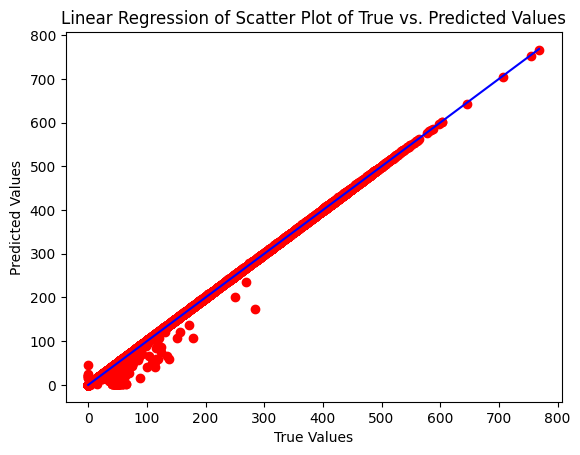

In [39]:
# Create a scatter plot of the true target values (Y_test) against the predicted target values (Y_pred)
plt.scatter(Y_test,test_pred , color='red')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='blue')  # Diagonal line for comparison
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression of Scatter Plot of True vs. Predicted Values')
plt.show()

### Random Forest Regressor

In [40]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [41]:
#predicting on test
test_preds1=RF.predict(X_test)

In [42]:
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
#print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TestData =  0.8856371972569427
RSquared value on test: 0.9999381689813595


In [43]:
from sklearn.metrics import r2_score

# Calculate R-squared (R2) Score
r2 = r2_score(Y_test, test_preds1)
print("R-squared (R2) Score:", r2)


R-squared (R2) Score: 0.9999381689813595


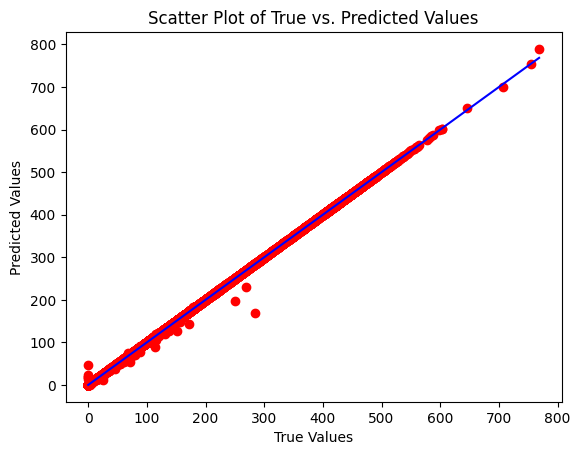

In [44]:
# Create a scatter plot of the true target values (Y_test) against the predicted target values (Y_pred)
plt.scatter(Y_test,test_preds1 , color='red')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='blue')  # Diagonal line for comparison
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True vs. Predicted Values')
plt.show()



In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [49]:
# Build the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu',),
    Dense(16, activation='relu'),  # Additional hidden layer
    Dense(8, activation='relu'),   # Additional hidden layer
    Dense(4, activation='relu'),   # Additional hidden layer
    Dense(1)  # Output layer (1 neuron for regression)
])

# Compile the model
model.compile(optimizer='adam',  # Changed optimizer to 'adam'
              loss='mean_squared_error',
              metrics=['mae', 'mse'])

# Train the model
model.fit(X_train, Y_train, epochs=15, batch_size=16, validation_split=0.1)

# Evaluate the model
test_loss = model.evaluate(X_test, Y_test)

# Predict harvest quantity
predictions = model.predict(X_test)


Train on 119856 samples, validate on 13318 samples
Epoch 1/15
119856/119856 [==============================] - 11s 89us/sample - loss: 133.9808 - mae: 1.1766 - mse: 133.9781 - val_loss: 0.3099 - val_mae: 0.1327 - val_mse: 0.3099
Epoch 2/15
119856/119856 [==============================] - 11s 92us/sample - loss: 0.9826 - mae: 0.3298 - mse: 0.9826 - val_loss: 0.3803 - val_mae: 0.1644 - val_mse: 0.3803
Epoch 3/15
119856/119856 [==============================] - 11s 95us/sample - loss: 0.7908 - mae: 0.2748 - mse: 0.7908 - val_loss: 0.3749 - val_mae: 0.2042 - val_mse: 0.3749
Epoch 4/15
119856/119856 [==============================] - 11s 91us/sample - loss: 0.7505 - mae: 0.2845 - mse: 0.7505 - val_loss: 0.2913 - val_mae: 0.1391 - val_mse: 0.2913
Epoch 5/15
119856/119856 [==============================] - 12s 96us/sample - loss: 0.7567 - mae: 0.2534 - mse: 0.7567 - val_loss: 0.3011 - val_mae: 0.1222 - val_mse: 0.3011
Epoch 6/15
119856/119856 [==============================] - 11s 91us/sample

In [58]:
# Save the model to a file
model.save("prediction_model.h5")


In [50]:
r2_score=r2_score(predictions,Y_test)
print("r2_score:",r2_score)

r2_score: 0.9999852433894266


In [52]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test,predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.1871396244894178


In [55]:
# Calculate Mean Squared Error (MSE)
mae = mean_absolute_error(Y_test,predictions)
print(f'Mean absolute Error: {mae}')

Mean absolute Error: 0.10242273039171312


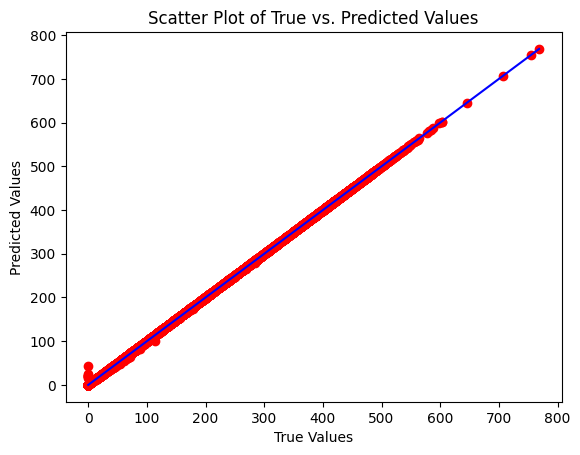

In [56]:
# Create a scatter plot of the true target values (Y_test) against the predicted target values (Y_pred)
plt.scatter(Y_test,predictions , color='red')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='blue')  # Diagonal line for comparison
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True vs. Predicted Values')
plt.show()



In [ ]:
# Create a DataFrame with the actual and predicted values
df = pd.DataFrame({'Actual': Y_test, 'Predicted': test_preds1})

# Print the DataFrame
print(df)

In [57]:
#SOi	Noi	RpiSPM

SOi = float(input("Enter the value of SOI:"))
NOi = float(input("Enter the value of NOI:"))
RPi = float(input("Enter the value of RPI:"))
SPM = float(input("Enter the value of SPM:"))
# Create a numpy array with the input values
input_data = np.array([[SOi, NOi, RPi, SPM]])

# Make predictions using the trained model
predicted_value = model.predict(input_data)

# Print the predicted value
print("Predicted Value:", predicted_value[0])
if predicted_value<=50:
    print("AIR Quality is predicated as --> Good")
elif predicted_value>50 and predicted_value<=100:
    print ("AIR Quality is predicated as --> Moderate")
elif predicted_value>100 and predicted_value<=200:
     print ("AIR Quality is predicated as --> Poor")
elif predicted_value>200 and predicted_value<=300:
     print ("AIR Quality is predicated as --> Unhealthy")
elif predicted_value>300 and predicted_value<=400:
     print ("AIR Quality is predicated as --> Very unhealthy")
elif predicted_value>400:
     print ("AIR Quality is predicated as --> Hazardous")

Enter the value of SOI:12
Enter the value of NOI:12
Enter the value of RPI:12
Enter the value of SPM:12
Predicted Value: [13.008349]
AIR Quality is predicated as --> Good
